We want to turn a list of DEBiL\_heads into a LC-writer. (i.e., read DEBiL_LCs and DEBiL_heads, fold 
  appropriately, e.g., with astrobase, put out plots)

In [1]:
%matplotlib inline
import numpy as np
from astrobase import plotbase as pb

In [2]:
print(pb.plot_mag_series.__doc__)

This plots a magnitude time series.

    If outfile is none, then plots to matplotlib interactive window. If outfile
    is a string denoting a filename, uses that to write a png/eps/pdf figure.

    timebin is either a float indicating binsize in seconds, or None indicating
    no time-binning is required.

    sigclip is either a single float or a list of two floats. in the first case,
    the sigclip is applied symmetrically. in the second case, the first sigclip
    in the list is applied to +ve magnitude deviations (fainter) and the second
    sigclip in the list is appleid to -ve magnitude deviations (brighter).

    normto is either 'globalmedian', 'zero' or a float to normalize the mags
    to. If it's False, no normalization will be done on the magnitude time
    series.

    


In [3]:
print(pb.plot_phased_mag_series.__doc__)

This plots a phased magnitude time series using the period provided.

    If epoch is None, uses the min(times) as the epoch.

    If epoch is a string 'min', then fits a cubic spline to the phased light
    curve using min(times), finds the magnitude minimum from the fitted light
    curve, then uses the corresponding time value as the epoch.

    If epoch is a float, then uses that directly to phase the light curve and as
    the epoch of the phased mag series plot.

    If outfile is none, then plots to matplotlib interactive window. If outfile
    is a string denoting a filename, uses that to write a png/eps/pdf figure.

    


In [4]:
! head ../data/DEBiL_heads/G199.txt

HAT-199-0000845 0.534756
HAT-199-0000845 0.641703
HAT-199-0014890 0.695139
HAT-199-0014890 0.603696
HAT-199-0014890 0.603143
HAT-199-0014890 0.926851
HAT-199-0014890 0.694661
HAT-199-0015348 11.022903
HAT-199-0726398 0.695155
HAT-199-0000525 0.518727


In [5]:
! ls ../data/DEBiL_LCs/G199 | head

HAT-199-0000525.txt
HAT-199-0000845.txt
HAT-199-0003801.txt
HAT-199-0009403.txt
HAT-199-0010916.txt
HAT-199-0011711.txt
HAT-199-0014194.txt
HAT-199-0014890.txt
HAT-199-0015348.txt
HAT-199-0015605.txt


In [6]:
! head ../data/DEBiL_LCs/G199/HAT-199-0000525.txt

52617.9240319 8.656620 0.001630
52702.5277319 8.656310 0.001710
52702.5349922 8.661250 0.001650
52704.6784873 8.649960 0.001630
52704.7012097 8.659830 0.001840
52704.7090786 8.673390 0.001600
52704.9107929 8.539040 0.001200
52705.7632744 8.672080 0.001650
52763.8712073 8.639750 0.001450
52768.6899403 8.668450 0.001450


```def plot_phased_mag_series(times,
                           mags,
                           period,
                           errs=None,
                           normto='globalmedian',
                           normmingap=4.0,
                           epoch='min',
                           outfile=None,
                           sigclip=30.0,
                           phasewrap=True,
                           phasesort=True,
                           phasebin=None,
                           plotphaselim=[-0.8,0.8],
                           fitknotfrac=0.01,
                           yrange=None):```

In [7]:
field = 'G199/'
head_path = '../data/DEBiL_heads/'+field[:-1]+'.txt'
DEBiL_head = np.genfromtxt(head_path, dtype=['U15',float], names=['hatid', 'blsperiod'])
LC_path = '../data/DEBiL_LCs/'+field+DEBiL_head[0][0]+'.txt'
LC = np.genfromtxt(LC_path, dtype=[np.float64,np.float64,np.float64], names=['time','epd000','err'])
#out_dir = '../results/prelim/'
#out_file = out_dir + 

2016-12-30T11:38:08.833232Z [INFO]: sigclip = 30.0: before = 31267 observations, after = 29966 observations
2016-12-30T11:38:08.859209Z [INFO]: sigclip = 30.0: before = 29966 observations, after = 29960 observations
2016-12-30T11:38:08.874294Z [INFO]: spline fit done. nknots = 100,  chisq = 6464907.89394, reduced chisq = 216.51455
2016-12-30T11:38:08.962765Z [INFO]: using period: 0.534756 d and epoch: 53215.778494


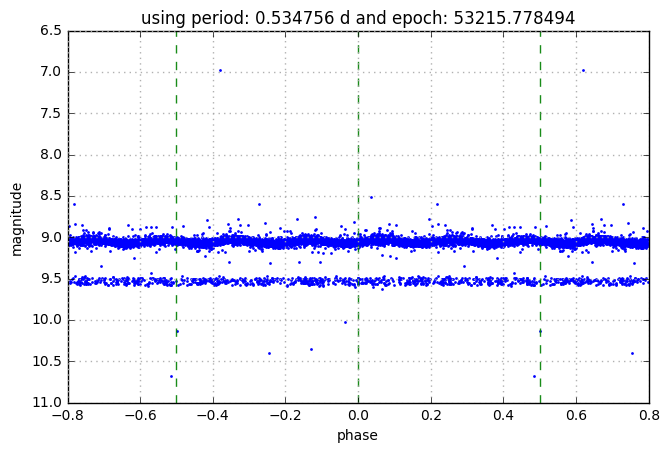

(0.53475600000000001, array([ 53215.7784942]))

In [9]:
pb.plot_phased_mag_series(LC['time'], LC['epd000'], DEBiL_head[0][1])

# So then actual script will look like:

```
field = 'G199/'
head_path = '../data/DEBiL_heads/'+field[:-1]+'.txt'
DEBiL_head = np.genfromtxt(head_path, dtype=['U15',float], names=['hatid', 'blsperiod'])

for name, period in DEBiL_head:
    LC_path = '../data/DEBiL_LCs/'+field+name+'.txt'
    LC = np.genfromtxt(LC_path, dtype=[np.float64,np.float64,np.float64], names=['time','epd000','err'])
    out_file = '../results/prelim/'+name+'.png'
    pb.plot_phased_mag_series(LC['time'], LC['epd000'], period, outfile=out_file)
```